# More image processing with ```OpenCV```

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

We're going to start by seeing more ways that we can manipulate images using ```OpenCV```.

In [49]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

__Rotation__

To rotate about a point, we first need to define that point and then use the function ```cv2.getRotationMatrix2D```.

This function takes the following arguments:

```cv2.getRotationMatrix2D((x_point, y_point), degrees, scale)```

In [17]:
# creating a matrix
M = cv2.getRotationMatrix2D((width/2, height/2), -45, 2) 
#defining the center point to be half way in the x-axis and half way up the y-axis.
# the image is moved 45 degress anti clockwise. - makes it clockwise
# the last number is scaling up (zooming in).

In [18]:
M

array([[   1.41421356,   -1.41421356,   88.7329727 ],
       [   1.41421356,    1.41421356, -294.70771953]])

In [19]:
rotated = cv2.warpAffine(image, M, (width, height))
# warpAffine is used to do translation or rotation of an image or matrix
# take the image and the matrix at put them together

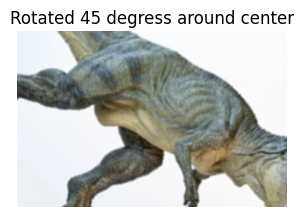

In [20]:
jimshow(rotated, "Rotated 45 degress around center")

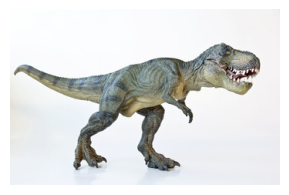

In [21]:
#note that the actual image hasn't been changed
jimshow(image)

__Translation__

In [ ]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

To *translate* an image, there is no specific built-in function with ```OpenCV``` to define a translation matrix. 

Instead, we need to define then translation matrix we want to use.

We can do that using ```numpy```.

In [38]:
# using translation
M = np.float64([[1, 0, 25],
                [0, 1, 50]])

# - moves the image up the y-axis ord to the left on the x-axis 

We can then use the ```cv2.warpAffine()``` function to translate our image.

There's some tricky maths involved here - for the mathematically inclined, you can read more [here](https://people.computing.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf)

But the crucial point is that we're essentially multiplying together the original image by the translation matrix ```M``` that we've just defined, which results in a modified image being created.

In [39]:
shifted = cv2.warpAffine(image, M, (width, height))

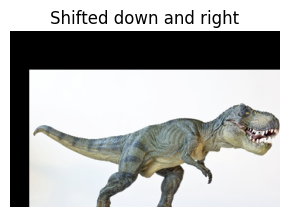

In [44]:
jimshow(shifted, "Shifted down and right")
#image moved 25 pixel on the x-axis and 50 pixel on the y-axis

## Drawing

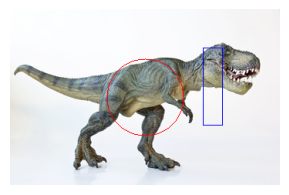

In [52]:
# cv2.rectangle(image, start_point, end_point, colour, thickness)
cv2.rectangle(image, (250, 50), (275, 150), (255, 0,0), 1)
jimshow(image)
# using the function cv2.rectangle
# start point is the upper left corner or the rectangel and the end point is the deown right corner. 

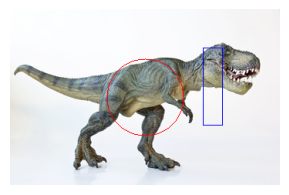

In [53]:
#Note that the original image is actually changed now. To get rid of the boxed, the image must be reloaded in the top of the nb. 
jimshow(image)  

__Draw circle__

In [50]:
(centerX, centerY) = (width // 2, height// 2)
#// is floor division, it gives us the whole int value no matter what the decimal of an float is. 11/2 = 5,5, but 11//2 = 5. 
# we use // to get a whole number, so it actually matches a pixel.

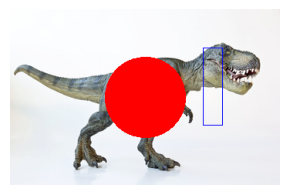

In [57]:
# cv2.circl(image, cent_coords, radio, colour, thickness)
cv2.circle(image, (centerX, centerY), 50, (0,0,255), -3)
jimshow(image)
# the cyntax og cv2.rectangel and cv2.circle is the same
# - in the "thickness", is filling the whole figure with colour

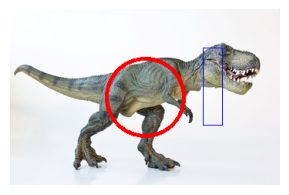

In [56]:
#Note that aagun the original image is actually changed now. To get rid of the boxed, the image must be reloaded in the top of the nb. 
jimshow(image)  

**NOTE:** Drawing on images is *destructive*! It modifies the image in place and can't easily be removed. 

If you draw on an image and then decide you want the original image without the drawings on it, you'll need to load the image again.

In [87]:
# load our dino pal again
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

## Using masks

We can see how bitwise operations work by just starting out with a simple rectangle and circle of white pixels on black backgrounds.

In [89]:
# Create a 300x300 array of zeros
zeros = np.zeros((height, width), dtype = "uint8")

**Question:** What does the following cell do? Can you explain it natural language?

In [90]:
#drawing a cirkel on to the array of zeros. So creating a rectangel, which is white and filled out. 
rect = cv2.rectangle(zeros, (25, 25), (275, 275), 255, -1)


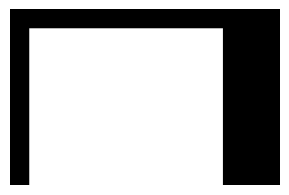

In [91]:
jimshow_channel(rect)

__Circle__

We can get a circular mask in much the same way, this time using ```cv2.circle()```.


In [92]:
# circle of zeries
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** Again, can you explain what this is doing? 

In [93]:
#drawing a cirkel on to the array of zeros
circ = cv2.circle(zeros, (150, 150), 150, 255, -1)

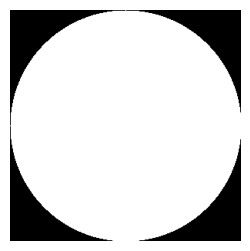

In [94]:
jimshow_channel(circ)

__Rectangle mask__

In [95]:
# just another way of doing the above (chose what you like)
# Mask should be same shape as image
mask = np.zeros(image.shape[:2], dtype="uint8")

**Question:** What is this cell doing?

In [96]:
#creating a white rectangel
mask = cv2.rectangle(mask, (100,100), (200, 200), 255, -1)

**Question:** What do you expect to see here?

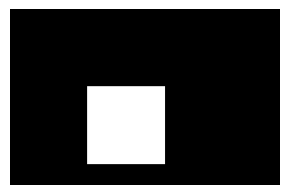

In [97]:
jimshow_channel(mask)

**Question:** And what do you expect to see here?

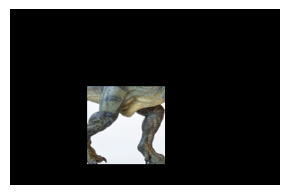

In [98]:
#using cv2.bitwise_and on our image and use the mask. The function takes the image argument twice (the first is the source, the other is the destination)
jimshow(cv2.bitwise_and(image, image, mask=mask))

__Circular mask__

**Question:** What do you think this does and what do you expect to see after running the next two cells?

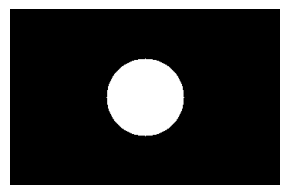

In [99]:
# create mask 'image'
mask = np.zeros(image.shape[:2], dtype = "uint8")
#create center point
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)
#the cirkel mask
jimshow_channel(cv2.circle(mask, (centre_x, centre_y), 50, 255, -1))

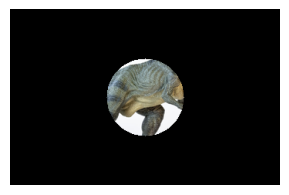

In [100]:
#gives us the output where the mask is 1 (white) and there is content on the image
jimshow(cv2.bitwise_and(image, image, mask=mask))

#Note that once again the image is changed for good.

__Load image__

In [101]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

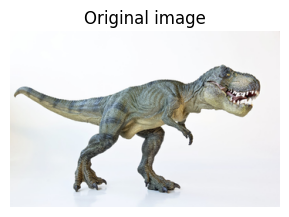

In [102]:
jimshow(image, "Original image")

## Exercise

Last week we saw how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

- In your groups, rework the code from last week into a function which can create a colour histogram for any given image based on it's filename. I.e., the function should.
    - Load an image
    - extract histograms across three channels
    - plot results to screen
    - save visualisation

The objective of this exercise is to get you thinking about how to define functions in Python which can be reused in different contexts. 

In [200]:

#create function
def plot_histogram(filename):  
    input_path = os.path.join("..", "data", "img", filename)#set data path (now the function only works on images in the "img" folder inside the "data" folder)
    image = cv2.imread(input_path) #load image
    channels = cv2.split(image) #split color channels
    colors = ("b", "g", "r") # colors is a tuble comprising three values: "b", "g" and "r"
    plt.figure()
    plt.title("Histogram") # give it titel
    plt.xlabel("Bins") # give x-axis a name
    plt.ylabel("# of Pixels") # give y-axis a name
    
    for (channel, color) in zip(channels, colors): # zip takes two obejcts and zip them together into a tuble e.g. the red color channel and the string "R". The first enty in the list "channels" are joined together with first entry in "colors"
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])# Create a histogram
        plt.plot(hist, color=color)# Plot histogram
        plt.xlim([0, 256])# Set limits of x-axis

    #save the plot
    output_path = os.path.join("..", "out", filename)
    plt.savefig(output_path)
    # Show plot
    plt.show()
   
   
   


FileNotFoundError: [Errno 2] No such file or directory: '../out/terasse.jpeg'

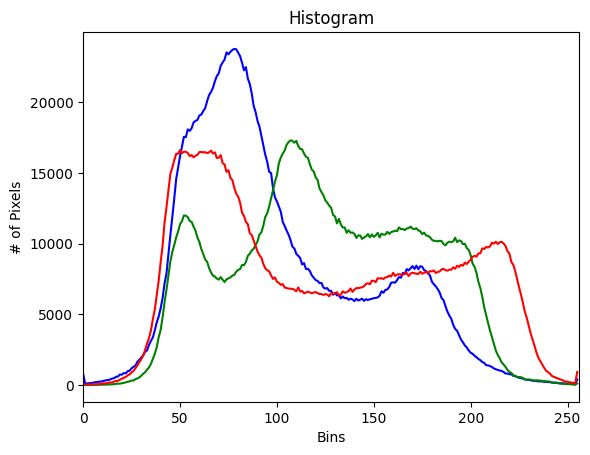

In [201]:
#run function
plot_histogram("terasse.jpeg") #ERROR: why does it try to find the image through the output?? If I write "filename" in the plt.savefig, it all works, unt the image is saved in the nbs folder. 

## Comparing histograms

We also saw briefly last week in class that we are able to compare images based on their colour histograms. This is something that can be done mathematically in ```OpenCV```. 

Let's load a different image.

In [180]:
image2 = cv2.imread(os.path.join("..", "data", "img", "t-rex2.png"))

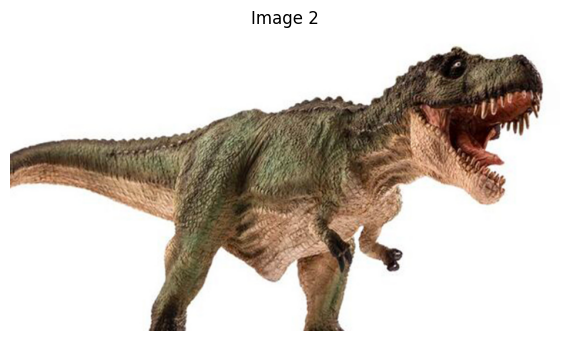

In [195]:
jimshow(image2, "Image 2")

## Comparing histograms

__Extract histograms__

Last week we saw how to extract histograms from images using ```cv2.calcHist()```, specifically for single channels.

In the lines below, we're ```cv2.calcHist()``` to extract histograms across all three channels.

In [196]:
# colour histogram for each color channel of our first t-rex
hist1 = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
#the "none" means not using a mask

In [197]:
# colour histogram for each color channel of our new and second t-rex
hist2 = cv2.calcHist([image2], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

__MinMax normalization__

Before comparing histograms, we first have to *normalise* them to occur within a narrower ranger of values. 

**Question:** Why do think we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

That is to say for every pixel ```value``` we subtract the ```min``` pixel value in the image, then divide that by the ```max``` minus the ```min```. 

In [202]:
# normalising by compressing everything down to a much smaller space (range of 0-1 (and the numbers become decimals) instead of range of 0-255)
hist1 = cv2.normalize(hist1, hist1, 0, 1.0, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0, 1.0, cv2.NORM_MINMAX)

__Comparing the first two histograms__

We're going to compare images computing the *Chi-Squared distance*, but there are a range of options available via OpenCV. 

You can read more [here](https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/).

In [205]:
# comparing the two normalised histograms
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)
# CHISQR is a mathematical formular, that we don't need to understand.
# the last number is the number of decimals wanted in the result. 
# the result number doesn't say anything by itself, but can be compared with other scores of other histograms.  

33.77

__Load a new image__

In [206]:
image3 = cv2.imread(os.path.join("..", "data", "img", "wave.png"))

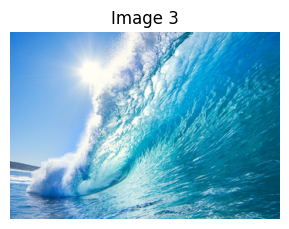

In [209]:
jimshow(image3, "Image 3")

__Compare with image 1__

In [210]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist3 = cv2.normalize(hist3, hist3, 0, 1.0, cv2.NORM_MINMAX)

We can then show calculate the scores between image and the other images

In [211]:
#comparing histogram 1 to itself
round(cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR), 2)

0.0

In [212]:
#comparing image 1 and 2 (the two t-rexes)
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

33.77

In [213]:
#comparing image 3(wave) and image 1 (the first t-rex)
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)
#the score is higher than the comparison between image 1 and 2 = image 1 and 2 are closer to each other than image 1 and 3. 

100.04

## Exercise

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.